In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
filename = "/content/drive/MyDrive/Data CodingDojo/athleteEventsNoPersonal.csv"
df = pd.read_csv(filename)
df.head()

,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,27.0,185.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40616 entries, 0 to 40615
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      40616 non-null  int64  
 1   Age     39143 non-null  float64
 2   Height  31615 non-null  float64
 3   Team    40616 non-null  object 
 4   NOC     40616 non-null  object 
 5   Games   40616 non-null  object 
 6   Year    40616 non-null  int64  
 7   Season  40616 non-null  object 
 8   City    40616 non-null  object 
 9   Sport   40616 non-null  object 
 10  Event   40616 non-null  object 
 11  Medal   5917 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


Análisis exploratorio de datos
Cada vez que consiguen un conjunto de datos, es una buena idea mirar a través del conjunto de datos y ver qué tienen. Esto a menudo involucra buscar por valores que faltan, correlaciones entre columnas, producir visualizaciones y más.

En el caso del código de abajo, vamos a buscar por diferentes partes del conjunto de datos que parezcan muy similares con estadísticas básicas, pero con diferentes distribuciones y visualizaciones. Normalmente no es una buena idea empezar un análisis y decidir qué mostrar con antemano, pero esto se hará solo con propósitos educativos.

In [4]:
heightCountryYear = pd.DataFrame(df.groupby(["NOC","Year","ID"])["Height"].mean())

In [8]:
temp = heightCountryYear.reset_index().groupby(["NOC","Year"])["Height"].apply(list)

In [10]:
temp = temp.reset_index()

In [11]:
temp

,NOC,Year,Height
0,AFG,1936,"[nan, nan]"
1,AFG,1948,"[nan, nan, nan, nan]"
2,AFG,1956,"[nan, nan]"
3,AFG,1960,[170.0]
4,AFG,1964,"[nan, 160.0]"
...,...,...,...
2535,ZIM,2000,"[176.0, 169.0, 178.0]"
2536,ZIM,2004,"[176.0, 168.0, 182.0, 178.0, 190.0]"
2537,ZIM,2008,"[173.0, 176.0]"
2538,ZIM,2012,[176.0]


In [17]:
# remove any country in a given year with participants that didnt have height
nanFilter = temp.loc[:, "Height"].apply(lambda x: np.logical_not(np.isnan(x).any()))
# filter for us
usFilter = temp["NOC"] == "USA"

In [19]:
nanFilter & usFilter

0       False
1       False
2       False
3       False
4       False
        ...  
2535    False
2536    False
2537    False
2538    False
2539    False
Length: 2540, dtype: bool

In [20]:
# this is  the data that we will plot
yearHeight = temp.loc[nanFilter & usFilter,:]

In [21]:
yearHeight

,NOC,Year,Height
2431,USA,1964,"[163.0, 186.0, 185.0, 157.0, 168.0, 185.0, 175..."
2432,USA,1968,"[198.0, 185.0, 157.0, 188.0, 183.0, 191.0, 180..."
2435,USA,1980,"[186.0, 185.0, 175.0, 180.0, 193.0, 168.0, 170..."
2438,USA,1992,"[188.0, 170.0, 180.0, 173.0, 173.0, 183.0, 176..."
2441,USA,1998,"[178.0, 170.0, 188.0, 180.0, 183.0, 183.0, 185..."
2442,USA,2000,"[202.0, 172.0, 186.0, 164.0, 173.0, 190.0, 183..."
2443,USA,2002,"[178.0, 170.0, 185.0, 175.0, 183.0, 180.0, 167..."
2444,USA,2004,"[172.0, 170.0, 193.0, 180.0, 173.0, 193.0, 203..."
2445,USA,2006,"[178.0, 185.0, 180.0, 188.0, 180.0, 165.0, 180..."
2446,USA,2008,"[163.0, 170.0, 172.0, 193.0, 183.0, 173.0, 203..."


In [22]:
yearHeight["Year"].values

array([1964, 1968, 1980, 1992, 1998, 2000, 2002, 2004, 2006, 2008, 2010,
       2012, 2014, 2016])

In [23]:
yearHeight["Height"].values[0]

[163.0,
 186.0,
 185.0,
 157.0,
 168.0,
 185.0,
 175.0,
 175.0,
 196.0,
 168.0,
 191.0,
 196.0,
 180.0,
 156.0,
 180.0,
 186.0,
 183.0,
 170.0,
 191.0,
 178.0,
 166.0,
 193.0,
 187.0,
 191.0,
 160.0,
 183.0,
 175.0,
 190.0,
 171.0,
 175.0,
 180.0,
 175.0,
 180.0,
 175.0,
 178.0,
 175.0,
 165.0,
 173.0,
 180.0,
 196.0,
 200.0,
 180.0,
 180.0,
 188.0,
 167.0,
 169.0,
 166.0,
 188.0,
 177.0,
 161.0,
 170.0,
 180.0,
 161.0,
 183.0,
 189.0,
 175.0]

Text(0.5, 1.0, 'US Olympic Heights Over Time')

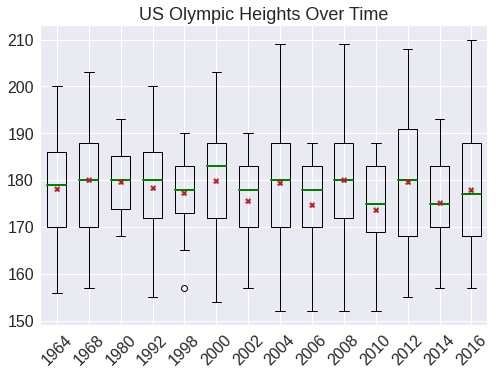

In [25]:
plt.style.use("seaborn")
indexList = []
for index, heights in enumerate(yearHeight["Height"].values):
  plt.boxplot(yearHeight["Height"].values[index],\
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans =True,
              meanprops = dict(marker='X', markeredgecolor ='black',
                               markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList, yearHeight["Year"].values, fontsize = 16,rotation = 45)
plt.yticks(fontsize = 16)
plt.title("US Olympic Heights Over Time", fontsize = 18)

Si se observan los boxplots, se puede ver que, en bastantes años, las medias (indicadas por la x roja) y las medianas (indicadas por la línea verde) son muy similares. Sin embargo, el “máximo” y “mínimo” son muy diferentes para algunos trazados. Además, siempre hay que recordar considerar el conocimiento del dominio de un conjunto de datos (los olímpicos no solían estar divididos en juegos de verano e invierno) y averiguar toda la información posible sobre un conjunto de datos. Para reiterar, la principal conclusión de esta sección es que a veces los datos no están en un formato fácil de usar.